# <font color="#DAA520">動機「為什麼要爬蟲？」</font><br />
> 你好奇什麼事？想完成什麼？
- **因為沒有 Data，所以做不到。**
# 要什麼 Data ?
> **清楚知道你的目標**，目標導向，沒有困難。

# 靜態網頁爬蟲
#### <font color="#DAA520">Q: **靜態網頁是神馬？**</font><br />

- ***一次性 load 所有內容*** 的網頁
- 蟲寶寶一次 request 便能得到所有信息

(◐‿◑)

### 你需要安裝的：
```shell=
$ pip install requests
$ pip install beautifulsoup4
$ pip install lxml
```

### 爬蟲的核心行動：
- 獲取網頁內容的 source code
- 從中篩選、提煉出你要的東西

In [1]:
import requests

### 目標：獲取 pycontw 2018 議程時間表

In [82]:
import sys

url = "https://tw.pycon.org/2018/zh-hant/events/schedule/"

# Pretending you are a human
headers = {"Cookies": "_ga=GA1.2.632429602.1519727086; __utma=70098837.632429602.1519727086.1541425192.1541425192.1; __utmc=70098837; __utmz=70098837.1541425192.1.1.utmcsr=google|utmccn=(organic)|utmcmd=organic|utmctr=(not%20provided); _gcl_au=1.1.482413441.1553002254; csrftoken=zL9yUFPAlCqErCeN5iv80kmCMSYxc1VmVRJkhYsKNkoCBd2sYvxyZqDEg1NKiKVI; sessionid=x7frbvfgs17jwm50w6brb2xvojxh4lp4; _gid=GA1.2.333361739.1553839508",
          "Referer": "https://tw.pycon.org/2018/zh-hant/events/overview/",
          "User-Agent": "Mozilla/5.0 (Linux; Android 6.0; Nexus 5 Build/MRA58N) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/72.0.3626.121 Mobile Safari/537.36"}

res = requests.get(url, timeout = 1)

with open("pycon2018_schedule.text", "w", encoding = "utf-8", ) as file:
    file.write(res.text)
    
# 可以去資料夾看看 pycon2018_schedule.text 是否存在

- headers: 身份偽裝，你是蟲，但你假裝是人
    - 自定制 `requests headers`
    - Referer --- 告訴 server 你是從哪個網站點進來的，不是憑空出現。
    - User-Agent --- OS 和 browser 型號版本，假裝你是正常瀏覽網頁。
    - Cookies --- 可加可不加，有些網站會 check，有勝於無。
---
- `requests` 的 `get` 方法，最簡單的獲取網頁內容的方法
- 創建獲取 response 的變數 `res`
- argu: `timeout` 設定秒數，超時就停止等待 response
- 創建叫 *pycon2018_schedule.text* 的文字檔，儲存你爬下來的網頁 html source code

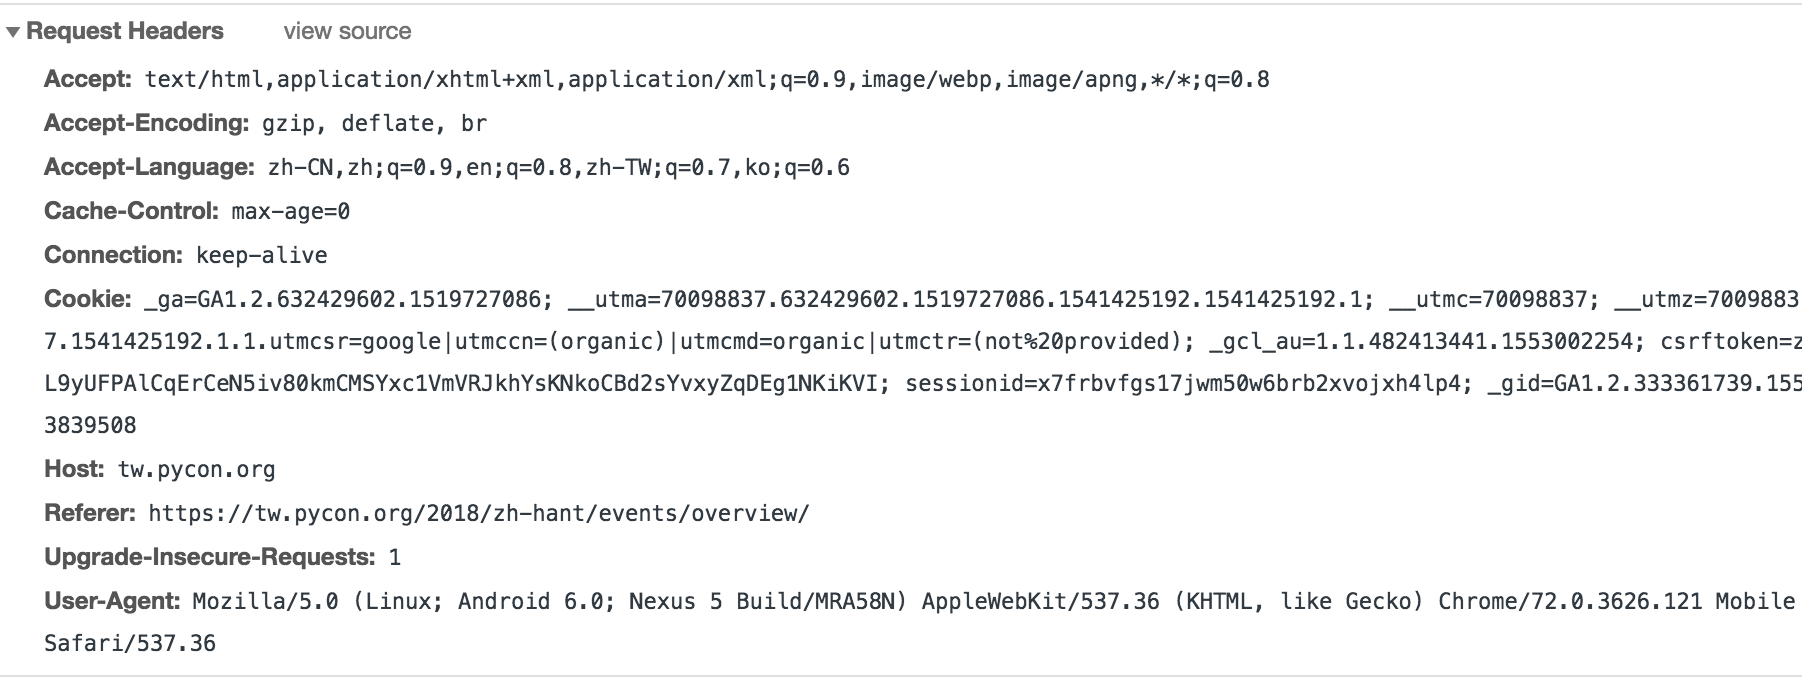

In [79]:
from IPython.display import Image
Image(filename = "headers.png")

### 很麻煩，不想去網站複製 headers

In [97]:
print("查看 headers", res.headers)
print("查看 response 的狀態碼", res)
print("-----")
print("查看狀態碼", res.status_code)
print("-----")
print("查看編碼方式", res.encoding)

查看 headers {'Server': 'nginx/1.14.0', 'Date': 'Fri, 29 Mar 2019 09:32:19 GMT', 'Content-Type': 'text/html; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding, Cookie', 'X-Frame-Options': 'DENY', 'Content-Language': 'zh-hant', 'strict-transport-security': 'max-age=2592000', 'x-xss-protection': '1; mode=block', 'Set-Cookie': 'csrftoken=pp75neSmWnUXQkgjfQ3aJQRIUt2sD9mKwttnObM5KxpEgoD6wJARzFho1QmjWRls; expires=Fri, 27-Mar-2020 09:32:19 GMT; HttpOnly; Max-Age=31449600; Path=/; Secure', 'Content-Encoding': 'gzip'}
查看 response 的狀態碼 <Response [200]>
-----
查看狀態碼 200
-----
查看編碼方式 utf-8


### 讀取檔案的寫法 1

In [74]:
import sys

file = open("pycon2018_schedule.text", 'r', encoding = "utf-8")
content = file.read()

file.close()

print(content)




<!DOCTYPE html>
<html>

<head>

<meta charset="utf-8">
<meta http-equiv="X-UA-Compatible" content="IE=edge">
<meta name="description" content="">
<meta name="viewport" content="width=device-width, initial-scale=1">


<title>時間表 | PyCon Taiwan 2018</title>


<link rel="shortcut icon" href="/2018/static/pycontw-2018/assets/favicon.ico">
<link rel="icon" type="image/png" href="/2018/static/pycontw-2018/assets/favicon-16x16.png" sizes="16x16">
<link rel="icon" type="image/png" href="/2018/static/pycontw-2018/assets/favicon-32x32.png" sizes="32x32">


<meta property="og:description" content="">
<meta property="og:image" content="https://tw.pycon.org/2018/static/pycontw-2018/assets/og-image.png">


<link rel="stylesheet" href="https://fonts.googleapis.com/earlyaccess/notosanstc.css">
<link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Roboto+Mono:300,400|Raleway:300,400">
<link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.css"

### 讀取檔案的寫法 2

In [62]:
import sys

for line in open("pycon2018_schedule.text", 'r'):
    print(line, end = "")




<!DOCTYPE html>
<html>

<head>

<meta charset="utf-8">
<meta http-equiv="X-UA-Compatible" content="IE=edge">
<meta name="description" content="">
<meta name="viewport" content="width=device-width, initial-scale=1">


<title>時間表 | PyCon Taiwan 2018</title>


<link rel="shortcut icon" href="/2018/static/pycontw-2018/assets/favicon.ico">
<link rel="icon" type="image/png" href="/2018/static/pycontw-2018/assets/favicon-16x16.png" sizes="16x16">
<link rel="icon" type="image/png" href="/2018/static/pycontw-2018/assets/favicon-32x32.png" sizes="32x32">


<meta property="og:description" content="">
<meta property="og:image" content="https://tw.pycon.org/2018/static/pycontw-2018/assets/og-image.png">


<link rel="stylesheet" href="https://fonts.googleapis.com/earlyaccess/notosanstc.css">
<link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Roboto+Mono:300,400|Raleway:300,400">
<link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.css"

### 試試看下面兩個

In [1]:
print(content.encode("utf-8"))

NameError: name 'content' is not defined

In [ ]:
print(content.encode("utf-8").decode("utf-8"))

### `requests` 讓你爬到完整的網頁 html source code
### 下一步，你需要篩選出有價值的（目標）資訊
- 所以自問兩個問題：
### Q1: What's your target data?
### Q2: How to select from the ocean?

---
# 我要爬：演講題目 + 講者名字
# 作法：觀察 html + 量身定制篩選器
---

### BeautifulSoup 解析器

In [65]:
from bs4 import BeautifulSoup

#### 1. 導入 html 源碼

In [71]:
soup = BeautifulSoup(res.text, 'lxml')
print(soup)

<!DOCTYPE html>
<html>
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="" name="description"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>時間表 | PyCon Taiwan 2018</title>
<link href="/2018/static/pycontw-2018/assets/favicon.ico" rel="shortcut icon"/>
<link href="/2018/static/pycontw-2018/assets/favicon-16x16.png" rel="icon" sizes="16x16" type="image/png"/>
<link href="/2018/static/pycontw-2018/assets/favicon-32x32.png" rel="icon" sizes="32x32" type="image/png"/>
<meta content="" property="og:description"/>
<meta content="https://tw.pycon.org/2018/static/pycontw-2018/assets/og-image.png" property="og:image"/>
<link href="https://fonts.googleapis.com/earlyaccess/notosanstc.css" rel="stylesheet"/>
<link href="https://fonts.googleapis.com/css?family=Roboto+Mono:300,400|Raleway:300,400" rel="stylesheet"/>
<link href="https://maxcdn.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.css" rel="stylesheet"/>

- 跟剛才 requests 會做的事一樣
- 倘若你要的目標資訊就在這一堆東西裡面
- 你是不是要學著看 html ？

### HTML 原理 + 標籤關係

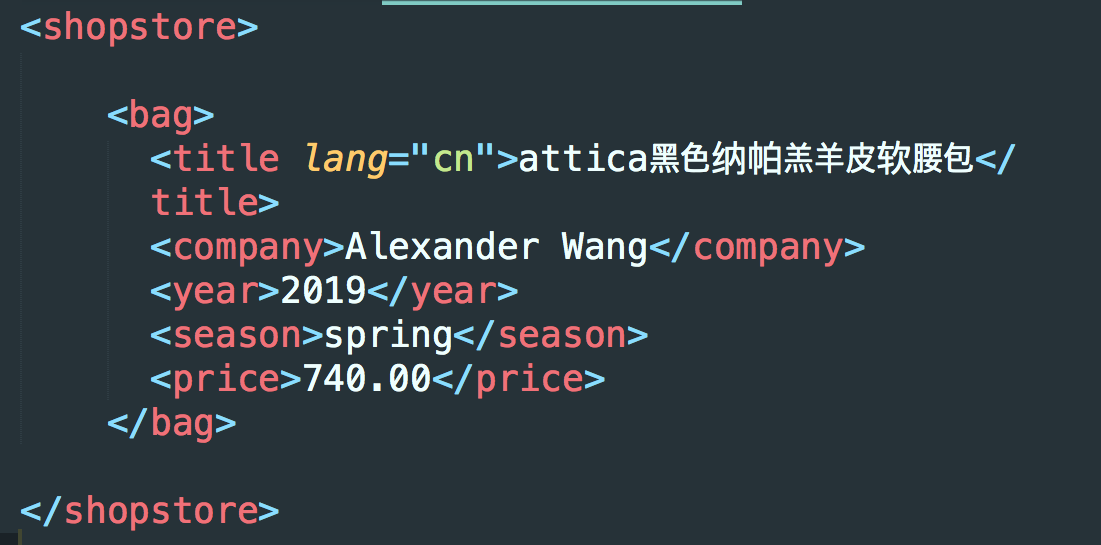

In [100]:
Image(filename = "example_html.png", width = 600, height = 400)

- **<...> String 中間放一些字符串 </...>** 兩個尖括弧成對存在的，叫標籤(tags)，a.k.a. 節點。
- 標籤可以有屬性，就像打神魔之塔的時候有金木水火土等屬性
    - `標籤 title` 擁有 `屬性 lang`，這個屬性的值 = `"cn"`
---
- ### 標籤關係
    - `bag` 被 `shopstore` 包裹起來
    - bag 是 shopstore 的子，shopstore 是 bag 的父。
    - bag, title 都是 shopstore 的子，但 bag 是直接子。
    - 有一個 **直接父** 的標籤互為兄弟姊妹，譬如 `title`, `company`, `year`, `season` 和 `price`

## 來，直接玩起來

- 美麗的湯有很多種方法，用來索引、找出你需要的內容
---
- #### find_all('標籤名', attrs = {"屬性名": "屬性的值"})
    - attrs 對應一個字典形式 ***（key:value）***

In [119]:
res = requests.get("https://tw.pycon.org/2018/zh-hant/events/schedule/")
soup = BeautifulSoup(res.text, 'lxml')


article = soup.find_all('article', attrs = {"data-target": "tabbing.pane"})
talk = soup.find_all('td', attrs = {"class": "talk"})
# print(talk)

talk_title = soup.find_all('p', attrs = {"class": "talk-title"})
# print(talk_title)

title = soup.find_all('a', attrs = {"class": "localed-url"})
# print(title)


for text in soup.find_all('a', attrs = {"class": "localed-url"}):
    print(text.get_text())


		陳昇瑋
	

		Crossing the Python 3 Rubicon
	

		Using Tensorflow on stellar classification
	

		Smart Things + Home Assistant: build your own smart home
	

		from ai.backend import python
	

		心靈遊戲: 利用Python探索直覺物理
	

		Python工業4.0 - 自造工廠監控系統
	

		Java-Jersey 到 Python-Flask 服務不中斷重構之旅
	

		Educational Code Reviews
	

		Python in Taiwan Photon Source : Motion Control, Data logger and Chatbot
	

		這樣的開發環境沒問題嗎？
	

		輿論分析量測電視劇觀看喜好的風向 Public opinion monitoring for TV series
	

		土炮一個 Line 股票機器人
	

		Adopting Python Asyncio in Large Scale Project (Instagram)
	

		自製高擴充性機器學習系統
	

		初學者聯盟 The Beginners: 超級英雄也是從初心者練起
	

		Katie McLaughlin
	

		維基教我做的金頭腦：知識圖譜製作初體驗
	

		以Astroquery套件擷取線上天文觀測資料
	

		MongoEngine Inside: the Detail of MongoDB & MongoEngine
	

		Deep Learning for NLP: PyTorch vs Tensorflow
	

		從螢幕閱讀程式 - NVDA - 探討資訊輔助科技與使用者介面可及性發展
	

		Easy way to build a real time and asynchronous web or app with Django Channels
	

		Deep dive into smart contracts and blockchains
	

		小鴨城(Duckietown)，一